In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **Machine Learning Overview**
---

This notebook is dedicated to the fundamentals of machine leanrning.

---
## 1. Confusion Matrix
---

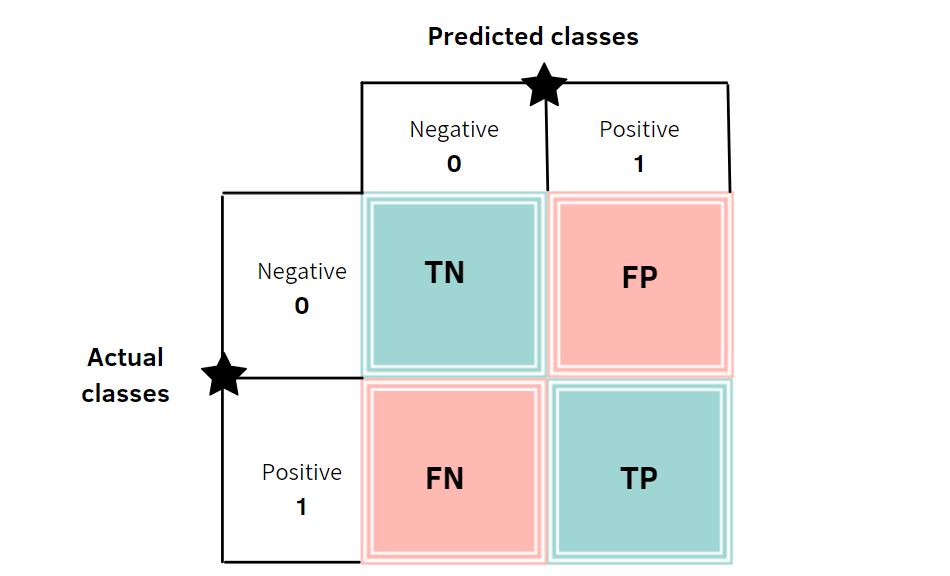



### 1.1. Precision

The accuracy of the *positive predictions*:

$$Precision = \frac{TP}{TP+FP}$$


### 1.2. Recall/Sensetivity/True Positive Rate

Ratio of *positive samples* that are **correctly** classified.

$$Recall = \frac{TP}{P} = \frac{TP}{TP+FN}$$


### 1.3. False Positive Rate


$$FPR = \frac{FP}{N} = \frac{FP}{FP+TN}$$



### 1.4. ROC curve

Only for **binary classification**. You want TPR close to 1 and FPR close to 0 which is the top left corner in the ROC curve.

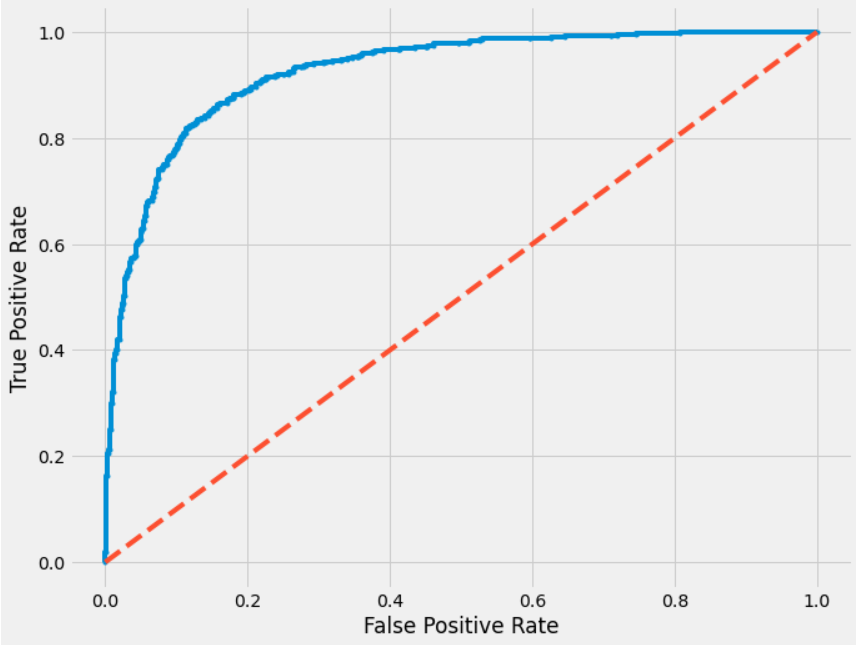

---
## 2. Linear Regression
---

Lets make some artificial data and plot the data along with the fitted linear regression model.

$$\hat{y}=\theta_0 + \theta_1 x_1 + ...+\theta_n x_n$$

Where $\theta_0$ is the intercept and $\theta_{1:n}$ are coefficients.

* **Note1:** We can train a LR using a SGD.

* **Note2:** When using SGD always make sure that the features are on the same scale!

The **cost function** for linear regression:
$$MSE(X,h_{\theta})=\frac{1}{m}Σ_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})^2$$

**Assumptions:**
- *Linearity*: assumes a linear relationship between $x$ and $y$.
- *Little to no multicollinearity*: Can be tested via Variance Inflation Factor (VIF)
- *Normality of residuals*
- *Homoscedasticity*: Variance of the residuals are the same across different values of $X$
- *Normality*: for any given $x$, $y$ is normally distributed.

The intercept is:  [4.44449297]
The coefficient is:  [[3.06576741]]


Text(0.5, 1.0, 'Linear Regression')

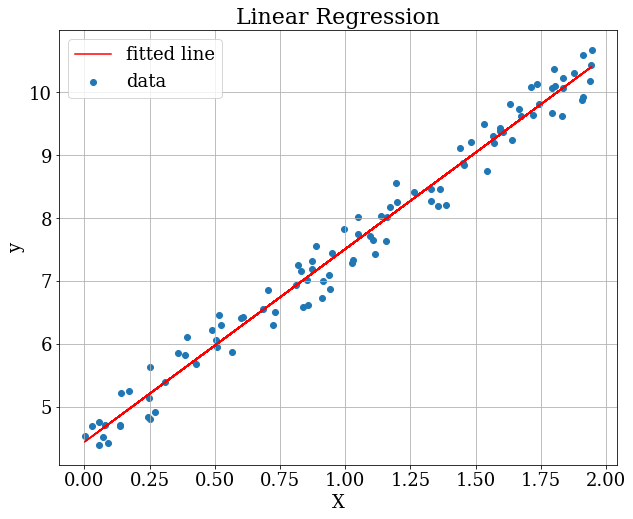

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

reg = LinearRegression()

reg.fit(X, y)

print('The intercept is: ', reg.intercept_)
print('The coefficient is: ', reg.coef_)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.family':'Serif', 'font.size':18})

plt.scatter(X, y, label='data')
plt.plot(X, reg.coef_*X + reg.intercept_, 'r', label='fitted line')
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression', fontsize=22)

### 2.1 Regularized Linear Models
To reduce the variance and prevent overfitting we can regularize the cost function:

* Ridge Regression:
$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\Sigma_{i=1}^{n} \theta_i^2$$

* Lasso Regression:
$$J(\theta) = MSE(\theta) + \alpha \Sigma_{i=1}^{n} |\theta_i|$$

* Elastic Net:
$$J(\theta) = MSE(\theta) + r\alpha \Sigma_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \frac{1}{2}\Sigma_{i=1}^{n} \theta_i^2$$

* **Note1:** Ridge regression is a good default, but if you suspect that only a few features are useful you better go with the lasso or elastic net.

Text(0.5, 1.0, 'Ridge Regression')

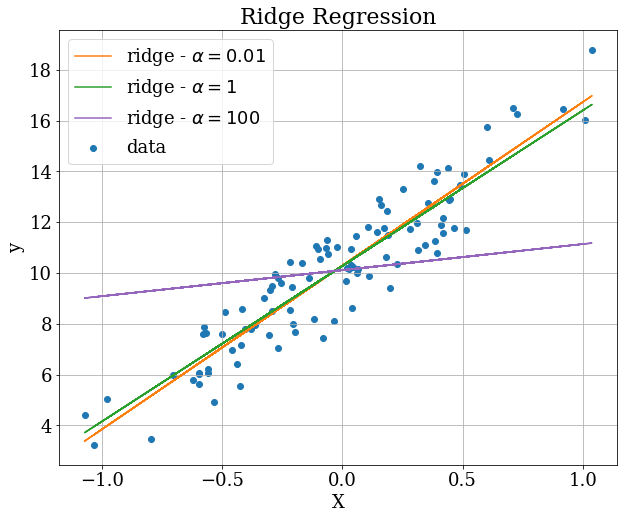

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

X = 0.5*np.random.randn(100, 1)
X_s = X + 0.8*np.random.rand(100, 1)
y = -5*X_s + 12*X + 12

ridge_001 = Ridge(alpha=0.01)
ridge_1 = Ridge(alpha=1)
ridge_100 = Ridge(alpha=100)

ridge_001.fit(X, y)
ridge_1.fit(X, y)
ridge_100.fit(X, y)


y_hat_001 = ridge_001.predict(X)
y_hat_1 = ridge_1.predict(X)
y_hat_100 = ridge_100.predict(X)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.family':'Serif', 'font.size':18})

plt.scatter(X, y, label='data')
plt.plot(X, y_hat_001, 'tab:orange', label=r'ridge - $\alpha=0.01$')
plt.plot(X, y_hat_1, 'tab:green', label=r'ridge - $\alpha=1$')
plt.plot(X, y_hat_100, 'tab:purple', label=r'ridge - $\alpha=100$')
plt.legend()
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression', fontsize=22)

---
## 3. Logistic Regression
---
Similar to linear regression but mostly used for classification to find the probability between the two classes.

$$\hat{p} = h_{\theta}(x) = \sigma(\theta^T x)$$
$$\sigma(t) = \frac{1}{1+e^{-t}}$$
$$\hat{p} = \frac{1}{1+e^{-\theta^T x}}$$

Where $\sigma(.)$ is the *sigmoid function* that outputs a number between $0$ and $1$. Usually the threshold is set to $0.5$.

Cost function of the Logistic Regression is:
$$J(\theta) = -\frac{1}{m} \Sigma_{i=1}^m[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]$$

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()

X_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y_df = pd.DataFrame(iris['target'], columns=['iris_type'])
iris_data = pd.concat([X_df, y_df], axis=1)

iris_data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
5,5.4,3.9,1.7,0.4,0
127,6.1,3.0,4.9,1.8,2
50,7.0,3.2,4.7,1.4,1
16,5.4,3.9,1.3,0.4,0
67,5.8,2.7,4.1,1.0,1


In [ ]:
logit = LogisticRegression(max_iter=200)

logit.fit(X_df, y_df)
y_hat = logit.predict(X_df)

pd.DataFrame(confusion_matrix(y_df.values, y_hat), columns=iris['target_names'], index=iris['target_names'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,47,3
virginica,0,1,49


---
## 4. Support Vector Machine (SVM)
---

*Soft margin classification* is when we balance between maximizing the margin between the classes and allow for some misclassifications. (Allows margin violations)

*Hard margin classification* is only possible when the data is linearly separable. (Does not allow margin violations)

* **Note1:** With parameter $C$, we can control the margin violations. A small $C~(\sim 1)$ allows more violations but larger margin and thus more generalizable model. A high value for $C~(\sim 100)$ enforces less margin violations.
* **Note2:** With SVM we need to scale the features.
* **Note3:** Always start with linear kernel especially if you have lots of data or many features. Next try Gaussian RBF. After that you can experiment with some other kernels.
* **Note4:** RGB has a hyperparameter gamma, $\gamma$, that controls overfitting and underfitting of the models. With larger $\gamma~(\sim 0.1)$ we tend to overfit and with smaller $\gamma~(\sim 10)$ we tend to underfit.

### SVM regression

To use SVM as a regressor, we reverse the objective. SVM regression tries to fit as many instances as possible on the street (margin) while limiting the margin violations. **Parameter $ϵ$** controls the margin violations.

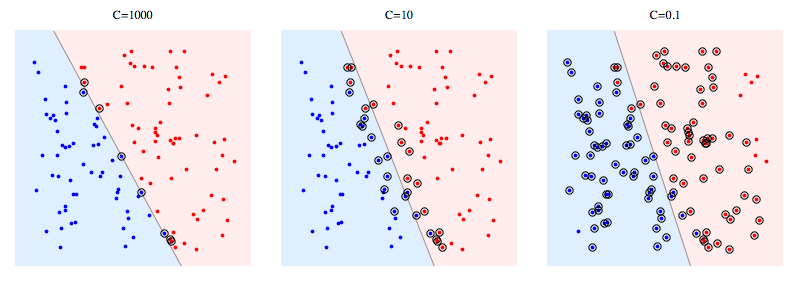

    0   1
0  97   3
1   4  46


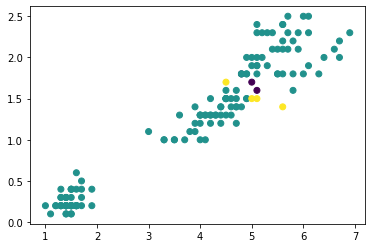

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


iris = load_iris()

X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([('scaler', StandardScaler()),
                    ('Linear_svc', LinearSVC(C=1, loss='hinge')),])
svm_clf.fit(X, y)

y_hat = svm_clf.predict(X)
iris_data['target_pred'] = y_hat

print(pd.DataFrame(confusion_matrix(y, y_hat)))

plt.scatter(X[:,0], X[:,1], c=y-y_hat)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


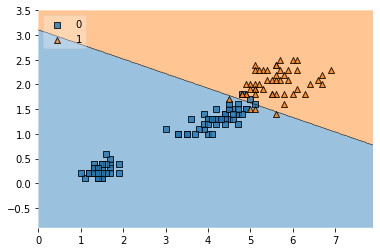

In [ ]:
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype(int), clf=svm_clf, legend=2)
plt.show()

---
# 5. K-nearest neighbors (KNN)
---

KNN is a local non-parametric method. It predicts the test data by looking at the $k$ training data point neaserst to the test data.

Usually uses Euclidean distance but it can use other distances too. Also, many different $k$ has to be examined and the one that produces the smallest loss (e.g. MSE) will be selected.

**Note1:** KNN does not work well with high-dimensional data (curse of dimensionality).

**Note2:** the complexity of the model increases.

**Note3:** low values of k could likely result in overfitting.

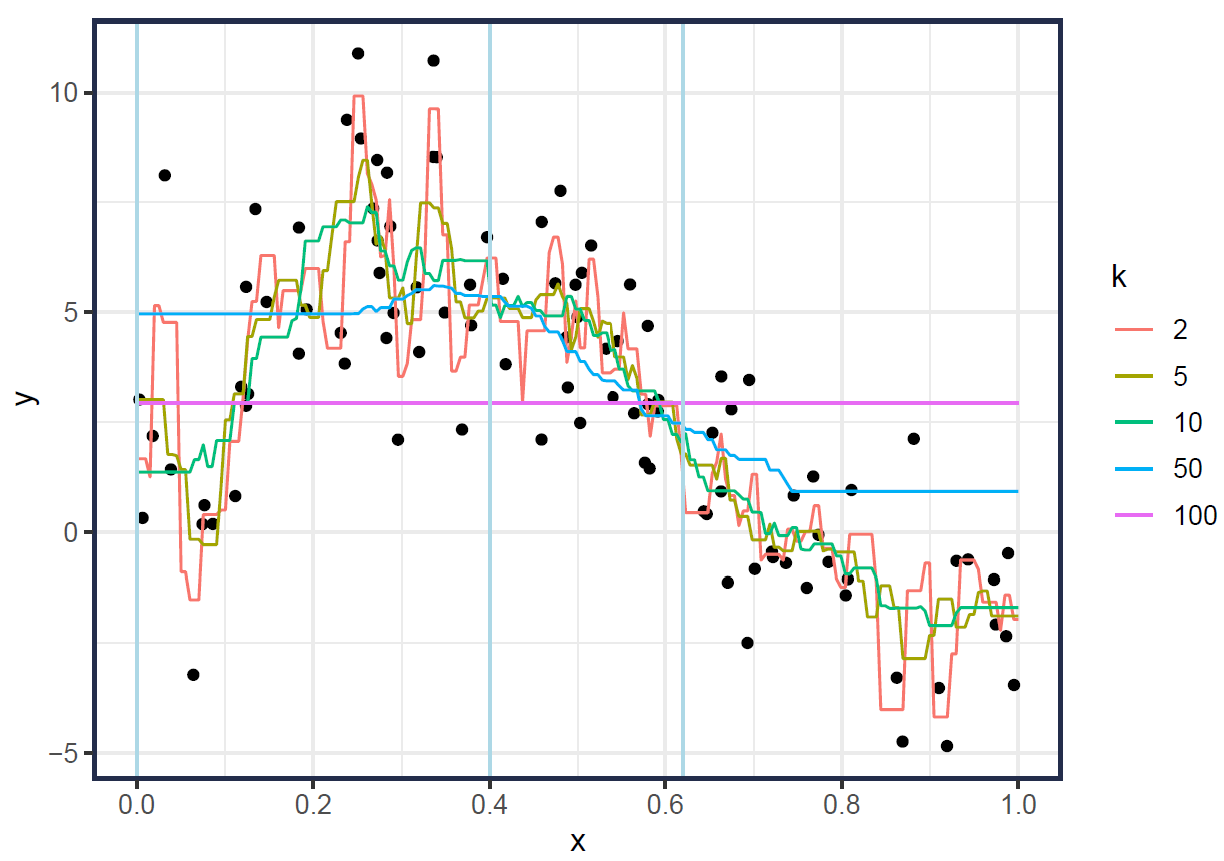

---
## 6. Decision Tree
---

Decision Tree works by creating hypercubes in the feature space and assigning them into the classes. It can always reach 100\% accuracy on the training data as we can continue the splits until we have one hypercube for each training sample! The central concept in decision trees is the **Gini impurity** of each node which is defined as:

$$G_i = 1-\Sigma_{k=1}^n p_{i,k}^2$$

Where $p_{i,k}$ is the ratio of class $k$ instances among the training samples in node $i$.

**Note1:** For a node whose all samples belong to **only one class** the Gini impurity is $0$.


### 6.1. CART training algorithm
For any given feature $k$ and threshold $t_k$, there is a **cost function** defined as the weight average of the *Gini impurities* of the left and right child:

$$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$$

The algorithm proceeds by the **finding the pair of $(k, t_k)$ that minimizes the cost function**.

Stopping criteria for CART:
- `max_depth` - maximum depth of the tree.
- There is no split that further reduces the impurity.
- `min_samples_split` - the minimum number of samples a node must have to be split.
-`min_samples_leaf` - minimum number of samples each leaf node must end up having
- `max_feature` - the maximum number of features to evaluate for splitting at a node

In general increasing the `min_*` hyperparameters or decreasing the `max_*` hyperparameters result in regularizing the trees.



### 6.2. Decision Tree regressor

Decision tree can be used to do regression. Essentially it assigns each hypercube (node), the **average value** of all the samples in the node.

CART cost function for decision tree regression is:

$$J(k, t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$$

where:

$$MSE_{node} = \Sigma_{i \in node}(\hat{y}_{node}-y^{(i)})^2 ~~~and~~~ \hat{y}_{node} = \frac{1}{m_{node}} \Sigma_{i \in node}y^{(i)}$$

- **Note1:** Decision trees tend to split the feature space orthogonally so they might be susceptible to poor generalization when data transforms (rotates for example). To limit this problem, we can apply **PCA** to the feature space.
- **Note2:** Decision trees are very sensetive to the data. Small changes to the data could drastically change the decision boundry.
- **Note3:** Decision trees are prone to overfitting. So, we need to properly set the stoping criteria.
- **Note4:** Decision Tree requires very little preprocessing. It **does not require** feature scaling or centering at all.
---
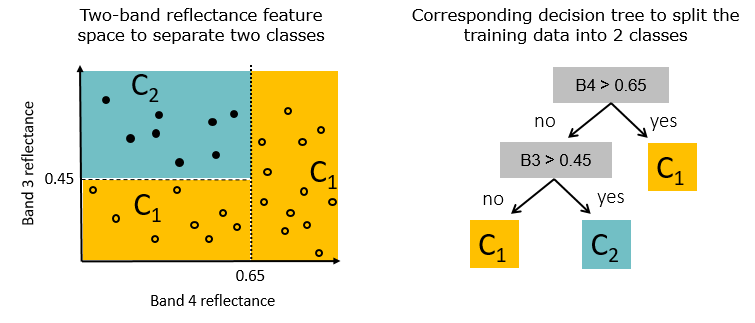

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

iris = load_iris()

# X = iris['data'][:, :]
X = iris['data'][:, (2,3)]
y = iris['target'][:]

# dt_clf = Pipeline([('PCA', PCA(n_components=2)), ('clf', DecisionTreeClassifier(max_depth=5))])
dt_clf = Pipeline([('clf', DecisionTreeClassifier(max_depth=3))])

dt_clf.fit(X, y)

y_hat = dt_clf.predict(X)

pd.DataFrame(confusion_matrix(y, y_hat))

,0,1,2
0,50,0,0
1,0,47,3
2,0,1,49


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


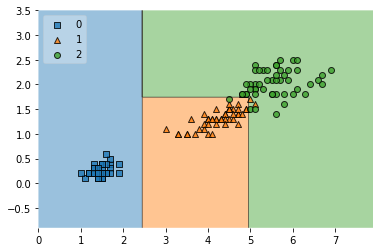

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype(int), clf=dt_clf, legend=2)
plt.show()

---
## 7. Ensemble Learning
---

It is when we use a collection of models to make the classification:

- *Hard voting*: we get the votes from all the models we have and we go with the majority class.
- *Soft voting*: Averaging the probabilities of all classifiers and making prediction based on that.

**Note1:** Soft voting usually works better than hard voting as it gives more weight to confident classifiers.

**Note2:** Ensemble methods work best when **predictors are independent** and the **models are very different in nature**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

cancer = load_breast_cancer()

log_clf = LogisticRegression(max_iter=300)
rnd_clf = RandomForestClassifier(max_depth=4)
svm_clf = SVC(max_iter=300)

X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

y_hat = voting_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_hat))
print('ensemble f1 score is:', f1_score(y_test, y_hat))

for clf, clf_name in zip((log_clf, rnd_clf, svm_clf), ('Logistic Regression', 'Random Forest', 'SVM')):
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)

  print('{} f1 score is:'.format(clf_name), f1_score(y_test, y_hat))

ensemble f1 score is: 0.981651376146789
Logistic Regression f1 score is: 0.9716981132075472
Random Forest f1 score is: 0.9674418604651163
SVM f1 score is: 0.9427312775330395


## 7.1. Bagging and Pasting
- *Bootstrap aggregating (bagging)* is an ensemble learning method that takes many random samples (**with replacement**) of the training set and trains one model one each of them and then aggregates the predictions.

- *Pasting* is when the sampling is done **without replacement**.

**Note1:** Bagging reduces the variance.

**Note2:** With bagging we can evaluate the ensemble model using *out-of-bag* (OOB) samples without the need to have a separate validation set.

**Note3:** In scikit-Learn we can get the OOB score via `oob_score_`. We can also get the decision probabilities for the training instances using `oob_decision_function_` attibute.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

wine_data = load_wine()
X = wine_data['data']
y = wine_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=100, bootstrap=True, oob_score=True)
bag_clf.fit(X_train, y_train)

y_hat = bag_clf.predict(X_test)
print('The OOB score is: ', bag_clf.oob_score_)
pd.DataFrame(confusion_matrix(y_test, y_hat))

The OOB score is:  0.9647887323943662


,0,1,2
0,14,0,0
1,1,14,1
2,0,0,6


## 7.2. Random Patches and Random Subspaces

Another idea is to randomly sample features.

- Random sampling of training samples and features simultaneously is called **random patches**.
- Only random sampling of features is called **random subspaces**.

**Notes1:** Random sampling of features increases the diversity of the models and reduces the variance at the cost of adding a bit more bias.

## 7.3. Stacking

The idea behind **stacking** is to **train a model to perform the aggregation** instead of hard or soft voting.

---
# 8. Random Forest
---

A random forest is an ensemble of *Decision Trees*, generally trained via the **bagging** method. Additionally, at every node, it **searches in a random subset of the features** instead of searching for the best split among all features. This increases diversity of the models.

## 8.1. Feature Importance

Rnadom Forest (tree-based algorithms) provide an easy way to compute the *feature importance*. The **feature importance** is measure as the "**average reduction in impurity of every feature when it is used for the split across all nodes in all trees in the forest**"

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score

wine_data = load_wine()
X = wine_data['data']
y = wine_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=4, max_leaf_nodes=16, n_jobs=-1)
rf_clf.fit(X_train, y_train)

y_hat = rf_clf.predict(X_test)

print('The balanced accracy is: {} and the f1 score is: {}'.format(balanced_accuracy_score(y_test, y_hat), f1_score(y_test, y_hat, average='micro')))
pd.DataFrame(confusion_matrix(y_test, y_hat))

The balanced accracy is: 1.0 and the f1 score is: 1.0


,0,1,2
0,19,0,0
1,0,21,0
2,0,0,14


---
# 9. Boosting
---

Any method that combines many weak learners to make a strong learner is called boosting. Boosting usually trains creates its models **sequentially** each trying to correct its predecessor.

Two most popular boosting algorithms are *AdaBoost* and *Gradient Boosting*.

## 9.1. AdaBoost

1.   AdaBoost start with a base classifier (such as Decision Tree) and fits it into the data. Then it adjusts the weights by giving more weight to the misclassified samples and fits another model and so on.
2.   Once desired number of models are fitted, the predictions of all models are weighted averaged to produce the final prediction. *Weights of the models are based on their accuracy on their own (weighted) dataset*.

* Initially the weight of each sample ($m$ training samples in total) is set to $1/m$. Then for each predictor (model) the error rate is defined as:
$$r_j=\frac{\Sigma_{i=1}^{m}w^{(i)}~~(∀ \hat{y}_j^{(i)} \neq y^{(i)})}{\Sigma_{i=1}^{m}w^{(i)})}$$
Where $\hat{y}_j^{(i)}$ is the $j^{th}$ predictor's prediction for the $i^{th}$ instance.

* Then the weight of each predictor is calculated as:
$$\alpha_j = \eta~log\frac{1-r_j}{r_j}$$
where $\eta$ is the learning rate (default is $1$). If a predictor is accurate its weight will be high and else it is low.

* Then the weights of the samples are updated as follows:
$$w^{(i)} = \begin{cases}
  w^{(i)} ~~~~~~~~~~~~~~~~~ if ~~\hat{y}_j^{(i)}=y^{(i)}\\    
  w^{(i)} exp(\alpha_j) ~~~~ if~~\hat{y}_j^{(i)} \neq y^{(i)}
  \end{cases} $$
  Then all weights are normalized by $\Sigma_{i=1}^{m}$ and a new predictor is trained using the new weights

* Finally when all models are trained the overall prediction is the weighted average of the predictions of all predictors.

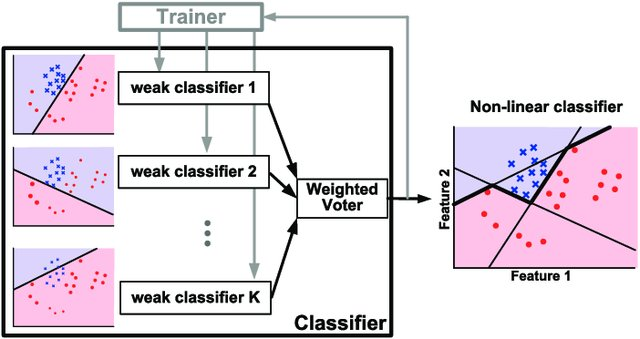

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd

bos = load_boston()

X = bos['data'][:,[5,7]]
y = (bos['target']>25)*1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200, algorithm='SAMME.R', learning_rate=0.8)
ada_clf.fit(X_train, y_train)

y_hat = ada_clf.predict(X_test)

print('f1 score is: ', f1_score(y_test, y_hat))
pd.DataFrame(confusion_matrix(y_test, y_hat))


f1 score is:  0.7567567567567567


,0,1
0,106,6
1,12,28


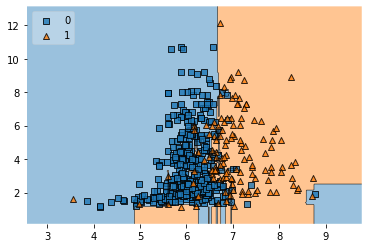

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype(int), clf=ada_clf, legend=2)
plt.show()

## 9.2. Gradient Boosting

Gradient Boosting creates trains each predictor on the residuals of its predecessor.

$$y_{j} = y_{j-1} - \hat{y}_{j-1} ~~~~~~ where ~~~~~ y_1=y$$

For a regression task the final prediction is simply the sum of the predictions of all predictors.

**Note1:** A very efficient implementation of the Gradient Boosting is the [XGBoost package](https://xgboost.readthedocs.io/en/stable/index.html). It uses more regularization and is faster to train.

Text(0.5, 1.0, 'Errors as a function of the number of estimators')

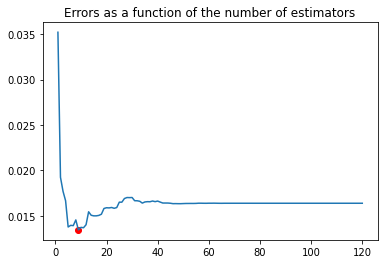

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-1, 1, 100)
y = X**2 + np.random.rand(100)/3

X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

GBRT = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=1)
GBRT.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in GBRT.staged_predict(X_test)]
bst_est = np.argmin(errors) + 1

plt.plot(range(1,120+1), errors)
plt.scatter(bst_est, errors[bst_est-1], c='r')
plt.title('Errors as a function of the number of estimators')

---
# 10. Dimensionality Reduction
---

High-D data are a risk of being sparse!

**Curse of dimentionality:** difficulty of finding a good model as the number of features increases that makes the model interactable.

Dimensionality reduction:

- speeds up training
- helps with the visualizstion

**Note1:** dimensionality reduction **does not improve the performance** of the model **GENERALLY**. In some cases though, it might help with the performance by filtering out the unnecessary noise in the data.

**Note2:** More features increase the risk of overfitting.

Two general approaches for dimensionality reduction:
- **Projection** like PCA
- Manifold


## 10.1 Principal Component Analysis (PCA)

PCA tries to find the first principal component (PC) such that is **preserves the maximum variance possible in the data**.

The second PC is orthogonal to the first PC and is such that it maximizes the remaining variance (residuals). And so on...

$$\bf PC = \Bigg(\bf c_1 ~ c_2 ~ ... ~ c_n \Bigg) $$

PCs are calculated using a technique called *singular value deomposition (SVD)*.

**Note1:** scikit-learn PCA automatically centers the data.

**Note2:** It is sometimes reasonable to set a target explained variance (e.g. 95%) and select the number of PCs based on that. The can be done easily with scikit-learn by setting `n_components` to a value between 0 and 1: `n_nomponents=0.95`.

**Note3:** It is possible to reconstruct the original data given the PCs. However, a small portion of the information is lost. This is called the *reconstruction error*.

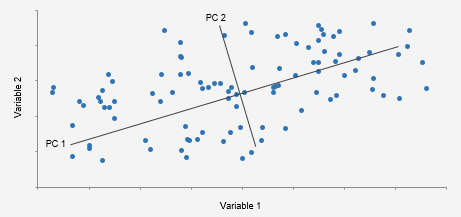

Explained Variance Ratio:
 [0.92461872 0.05306648]


Text(0, 0.5, 'PC 2')

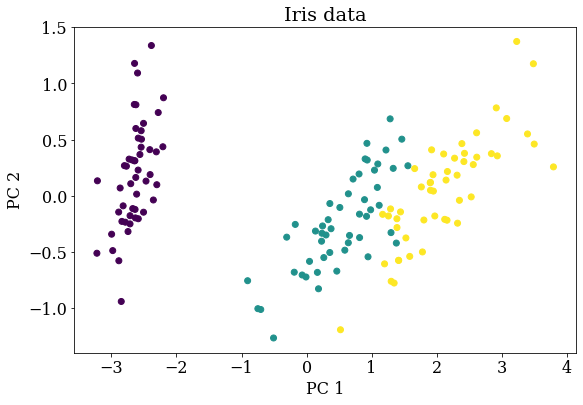

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris = load_iris()
pca = PCA(n_components=2)

X = iris['data']
X2D = pca.fit_transform(X)

print('Explained Variance Ratio:\n', pca.explained_variance_ratio_)

plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size':16, 'font.family':'serif'})
plt.scatter(X2D[:, 0], X2D[:, 1], c=iris['target'])
plt.title('Iris data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

---
# 11. Unsupervised Learning Techniques
---

When we are dealing with unlabeled data we need to use unsepervised techniques. Some of the most important unsupervised learning problems are:

- Clustering
  - Customer segmentation: segmenting customers based on their activity of purchasing behavior
  - Semi-supervised learning: propagating the labels to unlabeled samples based on the cluster they are in
  - Anomaly detection: identifying instances that have low affinity to all other clusters
- Anomaly detection
- Density estimation

[Here](https://scikit-learn.org/stable/modules/clustering.html) is a comprehensive list of clustering algorithms available in scikit-learn.

## 11.1. K-Means algorithm

K-Means algorithm is an efficient and fast clustering algorithm.

K-Means steps:
- start by randomly selecting $k$ centroids on of $n$ data points
- label instances to based on their proximity to the centroids (label them to the nearst centroid)
- update centroid by taking the average of all sample within each cluster
- repeat this process until the centroids are not updated

This process can be repeated many times with different initializations and keeping the best clustering (min inertia)

K-Means inertia is the sum of squared distances of each sample and its corresponding centroid:

$$inertia = \sum_{i=0}^n min_{\mu_j \in C}(||x_i - \mu_i||^2)$$

where $\mu_j$ is the $j^{th}$ centroid. You can get the inertia of a a K-Means in scikit-learn via `kmean.inertia`.

**Note1:** to find the best k we plot the inertia vs $k$ and pick the elbow (where the inertia stops reducing by a considerable amount).


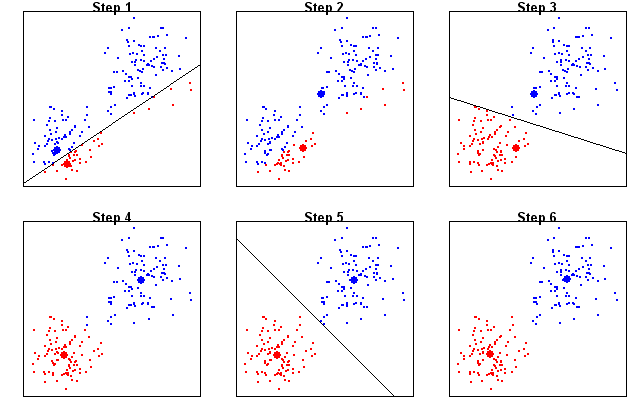

Text(0, 0.5, 'sepal width (cm)')

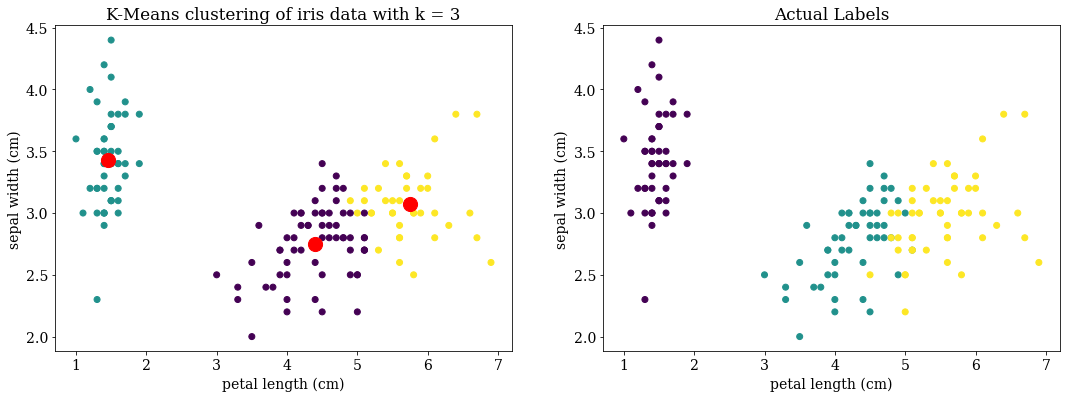

In [34]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, n_init=20, max_iter=500)
iris_data = load_iris()

X = iris_data['data']
feature_names = iris_data['feature_names']

kmeans.fit(X)

f1 = 2
f2 = 1

plt.rcParams.update({'font.family':'serif', 'font.size':14})
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.scatter(X[:,f1], X[:,f2], c=kmeans.labels_)
ax1.scatter(kmeans.cluster_centers_[:,f1], kmeans.cluster_centers_[:,f2], c='r', s=200)
ax2.scatter(X[:,f1], X[:,f2], c=iris_data['target'])

ax1.set_title('K-Means clustering of iris data with k = 3')
ax1.set_xlabel(feature_names[f1])
ax1.set_ylabel(feature_names[f2])

ax2.set_title('Actual Labels')
ax2.set_xlabel(feature_names[f1])
ax2.set_ylabel(feature_names[f2])

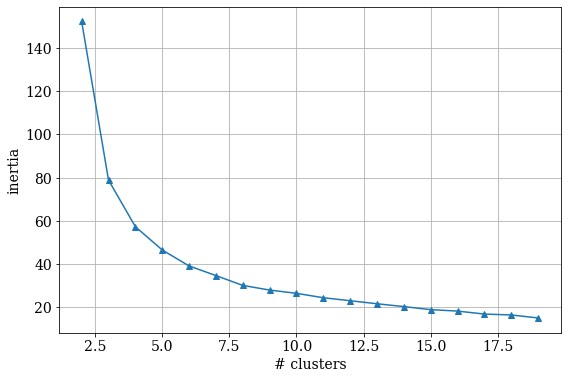

In [37]:
inertia = []
for k in range(2,20):
  kmeans = KMeans(n_clusters=k, n_init=20)

  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.rcParams.update({'font.family':'serif', 'font.size':14})
plt.figure(figsize=(9,6))
plt.plot(range(2,20), inertia, '^-')
plt.xlabel('# clusters')
plt.ylabel('inertia')
plt.grid()